In [2]:
import numpy as np
import matplotlib.pyplot as plt

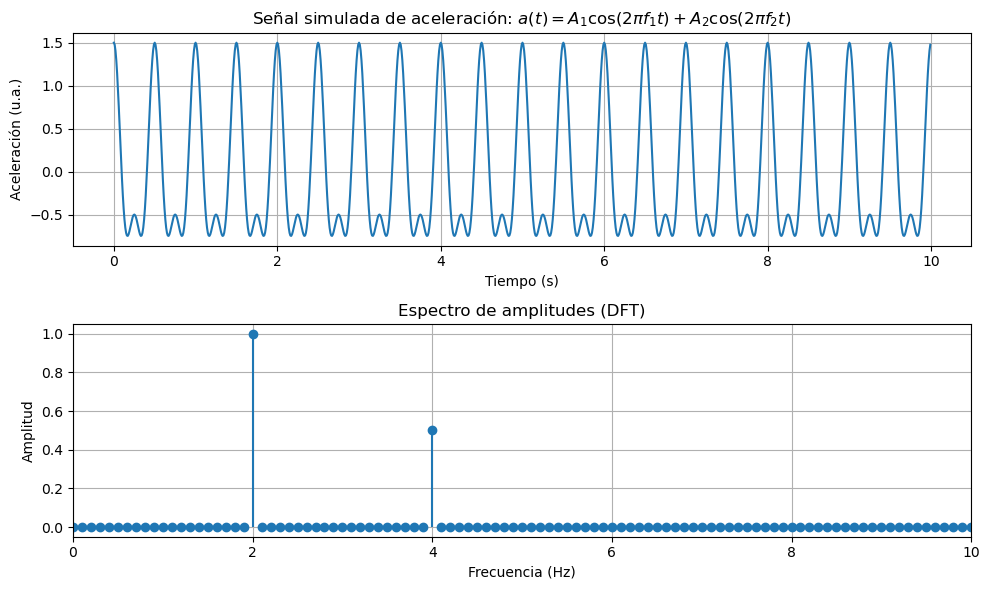

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de muestreo
fs = 100            # frecuencia de muestreo en Hz
N = 1000            # número de muestras
T = N / fs          # duración total (s)
t = np.linspace(0, T, N, endpoint=False)  # vector de tiempo

# Armónicos simulados
f1 = 2.0  # Hz (primer armónico)
f2 = 4.0  # Hz (segundo armónico)
A1 = 1.0
A2 = 0.5

# Señal simulada de aceleración (coherente con el sistema biela-manivela)
a_simulada = A1 * np.cos(2 * np.pi * f1 * t) + A2 * np.cos(2 * np.pi * f2 * t)

# DFT (usamos FFT para eficiencia)
A_fft = np.fft.fft(a_simulada)
freqs = np.fft.fftfreq(N, 1/fs)

# Magnitud normalizada
magnitudes = 2.0 / N * np.abs(A_fft[:N // 2])
frecuencias = freqs[:N // 2]

# --- Gráficas ---
fig, axs = plt.subplots(2, 1, figsize=(10, 6))

axs[0].plot(t, a_simulada)
axs[0].set_title("Señal simulada de aceleración: $a(t) = A_1\\cos(2\\pi f_1 t) + A_2\\cos(2\\pi f_2 t)$")
axs[0].set_xlabel("Tiempo (s)")
axs[0].set_ylabel("Aceleración (u.a.)")
axs[0].grid(True)

axs[1].stem(frecuencias, magnitudes, basefmt=" ")
axs[1].set_xlim(0, 10)
axs[1].set_xlabel("Frecuencia (Hz)")
axs[1].set_ylabel("Amplitud")
axs[1].set_title("Espectro de amplitudes (DFT)")
axs[1].grid(True)

plt.tight_layout()
plt.savefig("Ejemplo-señal-simulada")
plt.show()

In [8]:
# 📥 Carga de datos desde archivo exportado
import numpy as np

# Ruta del archivo .txt exportado desde Logger Pro
ruta_archivo = "Datos-prueba/biela-manivela-20Hz-22-05-2024.txt"

# Cargar el archivo (ajustar skip_header si es necesario)
data = np.genfromtxt(ruta_archivo, skip_header=7)

# Separar columnas
t, theta, omega, alpha, x, v, a = data.T

# Verifica las primeras filas
print("Primeras filas del archivo completo:")
print(data[:5])


Primeras filas del archivo completo:
[[ 0.05       -0.20943951 -3.76215417  0.6625787   0.3105865   0.24105278
  -0.1048479 ]
 [ 0.1        -0.40142573 -3.69912839 -0.21008593  0.322763    0.23686056
  -0.13731645]
 [ 0.15       -0.57595865 -3.72336907 -1.47544964  0.3345965   0.2296385
  -0.18842769]
 [ 0.2        -0.76794487 -3.84942063 -2.72842366  0.3459155   0.2186625
  -0.25432815]
 [ 0.25       -0.95993109 -4.01425728 -3.8650424   0.3565485   0.20446611
  -0.33842667]]


✅ Primer armónico (~1): frecuencia=0.997, amplitud=0.133
✅ Primer armónico (~1): frecuencia=1.047, amplitud=0.107
✅ Segundo armónico (~2): frecuencia=1.995, amplitud=0.023
✅ Segundo armónico (~2): frecuencia=2.045, amplitud=0.030


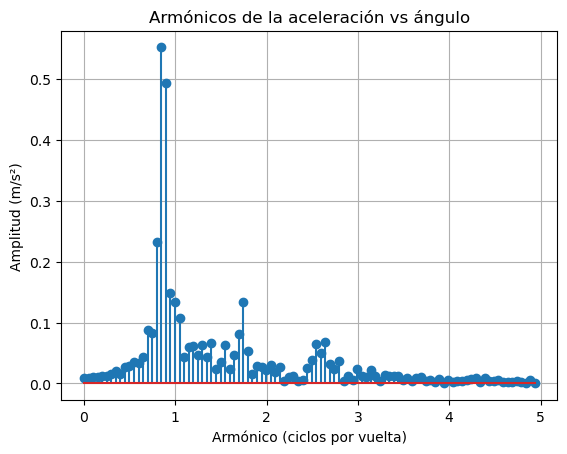

In [10]:
from scipy.interpolate import interp1d

# 1. Tu señal original
theta = t   # tu columna de ángulos (en radianes)
accel = a     # tu columna de aceleración (en m/s²)

# 2. Crear malla uniforme en theta
N_uniform = 200  # o mismo número que tenés, pero ahora con paso constante
theta_uniform = np.linspace(np.min(theta), np.max(theta), N_uniform)

# 3. Interpolar la aceleración en esa malla
interp = interp1d(theta, accel, kind='cubic')  # o 'linear' si querés algo más simple
accel_uniform = interp(theta_uniform)


#accel_uniform = accel
#theta_uniform = theta

# 4. FFT
fft_result = np.fft.fft(accel_uniform)
amplitudes = np.abs(fft_result) / N_uniform
frequencies = np.fft.fftfreq(N_uniform, d=(theta_uniform[1] - theta_uniform[0]))

# Aquí insertás el código para detectar armónicos
for i, (freq, amp) in enumerate(zip(frequencies[:N_uniform//2], amplitudes[:N_uniform//2])):
    if np.isclose(freq, 1.0, atol=0.05):
        print(f"✅ Primer armónico (~1): frecuencia={freq:.3f}, amplitud={amp:.3f}")
    if np.isclose(freq, 2.0, atol=0.05):
        print(f"✅ Segundo armónico (~2): frecuencia={freq:.3f}, amplitud={amp:.3f}")

# 5. Graficar
plt.stem(frequencies[:N_uniform // 2], amplitudes[:N_uniform // 2])
plt.xlabel("Armónico (ciclos por vuelta)")
plt.ylabel("Amplitud (m/s²)")
plt.title("Armónicos de la aceleración vs ángulo")
#plt.xlim(0, 0.3)
plt.grid(True)
plt.savefig("Ejemplo-señal-real")
plt.show()